In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

9449.962321455077 25792.20019866869
0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
Name: YearsExperience, dtype: float64 0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
2

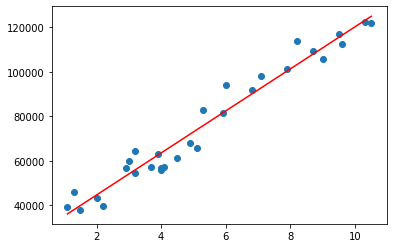

In [4]:
def readfile(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 0]
    Y = data.iloc[:, 1]
    #plt.scatter(X, Y)
    #plt.show()
    return X, Y


# Building the model with least square root method
def buildModel(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    num = 0
    den = 0
    for i in range(len(X)):
        num += (X[i] - X_mean)*(Y[i] - Y_mean)
        den += (X[i] - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    print (m, c)
    return m,c
   
    
# Making predictions

def bestFitLine(X,m,c):
    Y_pred = m*X + c
    return Y_pred
    
#Plot graph
def plotGraph(X,Y,Y_pred):
    plt.scatter(X, Y) # actual
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
    plt.show()
    

def predict(x, m,c):
    y_pred = c + m*x
    return y_pred

if __name__ == "__main__":
    # load the dataset
    X, Y = readfile('salary_data.csv')
    m,c = buildModel(X,Y)
    
    Y_pred=bestFitLine(X,m,c)
    print(Y_pred, Y)
    plotGraph(X,Y,Y_pred)
    x = input()
    predictedValue = predict(x,m,c)
   # print(predictedValue)
    